In [9]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [10]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [11]:
vocab_size = 7000
embedding_dim = 64
max_length = 300
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [12]:
articles = []
labels = []

with open("clean_uza_mini.csv", 'r', encoding="utf8") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[1])
        article = row[2]        
        articles.append(article)
print(len(labels))
print(len(articles))

1000
1000


In [13]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

800
800
800
200
200


In [14]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [15]:
print(dict(list(word_index.items())[0:10]))
print(len(list(word_index.items())))

{'<OOV>': 1, 'ва': 2, 'билан': 3, 'ҳам': 4, 'бу': 5, 'бўйича': 6, 'учун': 7, 'бир': 8, 'ўзбекистон': 9, 'бўлиб': 10}
38238


In [16]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

In [17]:
print(train_sequences[10])

[1, 3851, 1, 341, 33, 6, 43, 31, 44, 87, 77, 34, 72, 1, 3851, 1, 3852, 414, 3853, 2037, 3854, 167, 6, 3359, 3855, 3787, 2, 1, 2742, 309, 117, 2780, 2781, 2782, 2364, 2194, 44, 18, 291, 65, 7, 293, 87, 77, 34, 25, 479, 194, 73, 18, 220, 132, 2038, 74, 18, 141, 11, 229, 40, 91, 127, 128, 10, 79, 110, 25, 81, 512, 954, 1116, 161, 2783, 636, 240, 221, 2784]


In [18]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [19]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))


191
300
105
300


In [20]:
print(train_sequences[0])

[9, 974, 206, 1, 6087, 974, 5065, 97, 7, 887, 233, 456, 1871, 364, 1, 45, 1, 838, 1761, 1091, 2, 2997, 2318, 1, 1, 1, 1016, 9, 3, 1, 95, 6088, 163, 5065, 97, 975, 1328, 89, 2998, 1, 139, 5066, 974, 35, 2006, 358, 4329, 1572, 283, 3342, 215, 1, 39, 151, 7, 974, 887, 233, 456, 813, 1871, 364, 493, 200, 27, 5067, 8, 765, 80, 456, 1, 238, 2319, 11, 1, 4330, 2320, 974, 2154, 1, 766, 725, 1056, 586, 7, 5068, 1, 545, 2518, 1, 4, 1762, 319, 253, 9, 6089, 1207, 1329, 122, 365, 239, 1, 507, 645, 375, 1, 1, 2321, 1, 3343, 344, 1872, 1328, 89, 766, 202, 191, 5069, 311, 2736, 249, 6090, 1, 1, 1, 59, 11, 1208, 521, 1, 66, 1, 171, 72, 2322, 1873, 2155, 1209, 1, 839, 1, 17, 56, 6, 494, 1401, 861, 184, 265, 546, 3344, 3775, 767, 725, 944, 4, 1, 974, 9, 3, 254, 1, 1652, 3776, 97, 2999, 24, 1017, 4331, 1, 4, 61, 1057, 1, 470, 3343, 66, 3345, 862, 6, 67, 26, 1, 5, 3343, 66, 1484, 1, 1, 54, 146]


In [21]:
print(train_padded[0])

[   9  974  206    1 6087  974 5065   97    7  887  233  456 1871  364
    1   45    1  838 1761 1091    2 2997 2318    1    1    1 1016    9
    3    1   95 6088  163 5065   97  975 1328   89 2998    1  139 5066
  974   35 2006  358 4329 1572  283 3342  215    1   39  151    7  974
  887  233  456  813 1871  364  493  200   27 5067    8  765   80  456
    1  238 2319   11    1 4330 2320  974 2154    1  766  725 1056  586
    7 5068    1  545 2518    1    4 1762  319  253    9 6089 1207 1329
  122  365  239    1  507  645  375    1    1 2321    1 3343  344 1872
 1328   89  766  202  191 5069  311 2736  249 6090    1    1    1   59
   11 1208  521    1   66    1  171   72 2322 1873 2155 1209    1  839
    1   17   56    6  494 1401  861  184  265  546 3344 3775  767  725
  944    4    1  974    9    3  254    1 1652 3776   97 2999   24 1017
 4331    1    4   61 1057    1  470 3343   66 3345  862    6   67   26
    1    5 3343   66 1484    1    1   54  146    0    0    0    0    0
    0 

In [22]:
print(train_sequences[1])

[627, 2, 599, 1, 794, 3000, 172, 133, 2519, 599, 3, 1, 888, 13, 3000, 1210, 1266, 205, 3777, 296, 311, 284, 297, 1, 428, 140, 1, 1485, 945, 1763, 1, 1, 1, 3778, 2323, 1402, 164, 1, 1, 322, 4332, 1, 3346, 106, 726, 1, 1, 112, 166, 429, 612, 254, 6091, 1, 2520, 172, 5070, 627, 2, 599, 1, 1653, 1, 3000, 888, 13, 3000, 275, 2519, 1, 2521, 1330, 1, 2, 2156, 1, 2521, 1330, 1, 613, 1, 3779, 1330, 1, 2157, 3001, 1573, 1, 284, 1, 599, 376, 124, 366, 1654, 1, 207, 6092, 1266, 1403, 1874, 814, 3347, 112, 166]


In [23]:
print(train_padded[1])

[ 627    2  599    1  794 3000  172  133 2519  599    3    1  888   13
 3000 1210 1266  205 3777  296  311  284  297    1  428  140    1 1485
  945 1763    1    1    1 3778 2323 1402  164    1    1  322 4332    1
 3346  106  726    1    1  112  166  429  612  254 6091    1 2520  172
 5070  627    2  599    1 1653    1 3000  888   13 3000  275 2519    1
 2521 1330    1    2 2156    1 2521 1330    1  613    1 3779 1330    1
 2157 3001 1573    1  284    1  599  376  124  366 1654    1  207 6092
 1266 1403 1874  814 3347  112  166    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [24]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

200
(200, 300)


In [25]:
print(set(labels))

{'sport', 'business', 'world', 'science', 'culture'}


In [26]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [27]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[1]
[1]
[2]
(800, 1)
[5]
[3]
[4]
(200, 1)


In [28]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[0]))
print('---')
print(train_articles[0])

ўзбекистон ҳиндистон ҳамкорлик <OOV> кенгаймоқда ҳиндистон инфратузилмани ривожлантириш учун ўзбекистонга миллиард доллар имтиёзли кредит <OOV> мазкур <OOV> мамлакатнинг ўзбекистондаги фавқулодда ва мухтор элчиси <OOV> <OOV> <OOV> билдирди ўзбекистон билан <OOV> муҳим йўналишларидан бири инфратузилмани ривожлантириш борасидаги алоқаларни янада кенгайтиришга <OOV> деди элчи ҳиндистон миллий байрами республика кунига бағишлаб ўтказилган маросимда айни <OOV> амалга ошириш учун ҳиндистон ўзбекистонга миллиард доллар миқдорида имтиёзли кредит таклиф этади ушбу маблағнинг бир қисми миллион доллар <OOV> тўғрисидаги келишув йил <OOV> кучга кирган ҳиндистон томони <OOV> ривожлантиришга қаратилган лойиҳаларни қўллабқувватлаш учун грант <OOV> ёрдам ажратиш <OOV> ҳам билдирган ҳозирги пайтда ўзбекистон тараққиётининг устувор йўналишлари сифатида белгиланган қатор <OOV> тегишли лойиҳалар кўриб <OOV> <OOV> бошидан <OOV> мамлакатларимиз албатта савдоиқтисодий алоқаларни янада ривожлантиришга алоҳида 

In [29]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          448000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 522,694
Trainable params: 522,694
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 - 12s - loss: 1.6946 - accuracy: 0.2400 - val_loss: 1.5390 - val_accuracy: 0.3750
Epoch 2/10
800/800 - 9s - loss: 1.2670 - accuracy: 0.4512 - val_loss: 1.1584 - val_accuracy: 0.4250
Epoch 3/10
800/800 - 7s - loss: 1.0382 - accuracy: 0.5337 - val_loss: 1.0269 - val_accuracy: 0.5300
Epoch 4/10
800/800 - 7s - loss: 0.8666 - accuracy: 0.6413 - val_loss: 0.9038 - val_accuracy: 0.6400
Epoch 5/10
800/800 - 7s - loss: 0.8700 - accuracy: 0.6787 - val_loss: 1.0215 - val_accuracy: 0.6400
Epoch 6/10
800/800 - 7s - loss: 0.7626 - accuracy: 0.8125 - val_loss: 0.8616 - val_accuracy: 0.6850
Epoch 7/10
800/800 - 7s - loss: 0.4809 - accuracy: 0.8737 - val_loss: 0.6759 - val_accuracy: 0.7700
Epoch 8/10
800/800 - 8s - loss: 0.2733 - accuracy: 0.9375 - val_loss: 0.6245 - val_accuracy: 0.7950
Epoch 9/10
800/800 - 7s - loss: 0.1316 - accuracy: 0.9875 - val_loss: 0.5875 - val_accuracy: 0.8150
Epoch 10/10
800/800 - 7s - loss: 0.0530 - accuracy: 0

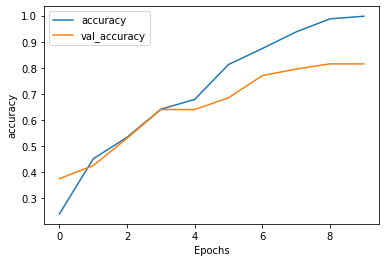

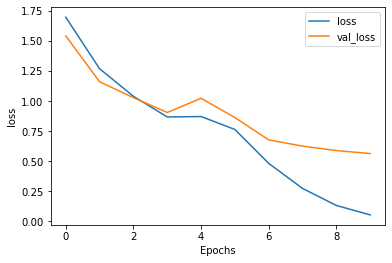

In [32]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")